In [1]:
import pandas as pd

In [2]:
import glob

In [3]:
files = glob.glob('walabot-data-master/data*.csv')

In [4]:
files

['walabot-data-master/data-SensorApp-leah-pc.csv',
 'walabot-data-master/data-SensorTargets-leah-pc.csv',
 'walabot-data-master/data-SensorApp-rpi1.csv',
 'walabot-data-master/data-SensorTargets-rpi1.csv']

In [140]:
d1 = pd.read_csv('walabot-data-master/data-SensorApp-leah-pc.csv')
d1 = d1[d1['x'] != 'x'].astype(float)
d2 = pd.read_csv('walabot-data-master/data-SensorTargets-leah-pc.csv')
d2 = d2[d2['x'] != 'x'].astype(float)
d3 = pd.read_csv('walabot-data-master/data-SensorTargets-rpi1.csv',names=d1.columns)

In [200]:
d3['target'].value_counts()

1    747
2    747
3    627
Name: target, dtype: int64

In [103]:
d1_filt = d1[(d1['z'] > 45) & (d1['z'] < 55) & (d1['amplitude'] < 0.00032)]

In [160]:
d2_filt = d2[(d2['z'] > 48) & (d2['z'] < 55)]

In [148]:
import seaborn as sns

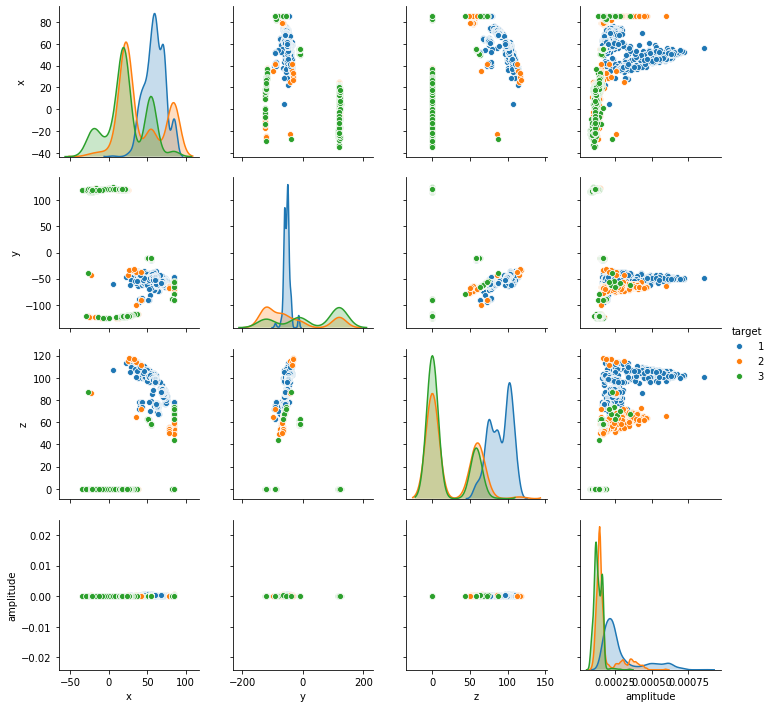

In [201]:
sns.pairplot(d3,x_vars=['x','y','z','amplitude'],
             y_vars=['x','y','z','amplitude'],hue='target')

In [80]:
from sklearn.manifold import TSNE

In [134]:
x_tsne = TSNE(n_components=2,random_state=123).fit_transform(d1_filt[['x','y','z','amplitude']])

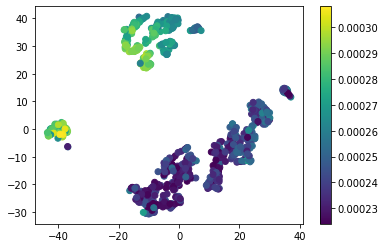

In [136]:
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=d1_filt['amplitude'])
plt.colorbar()

In [116]:
import numpy as np

In [117]:
r = np.sqrt(d1_filt['x']**2+d1_filt['y']**2+d1_filt['z']**2)

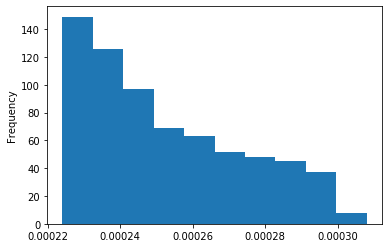

In [110]:
d1_filt['amplitude'].plot(kind='hist')

Text(0.5, 0, 'Z')

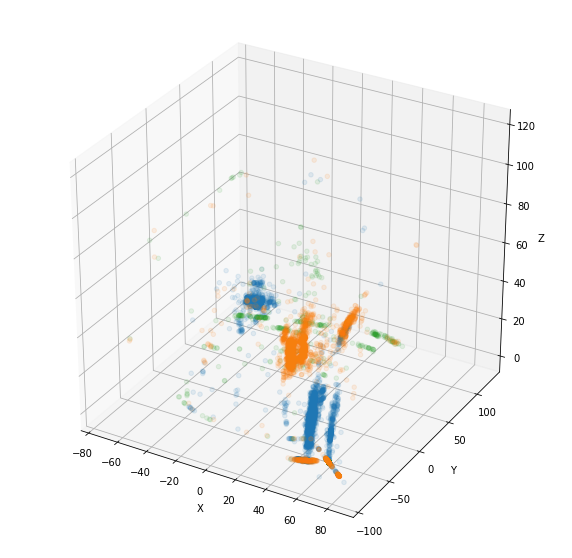

In [167]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    subset = d2[d2['target'] == i+1]
    ax.scatter(subset.x,subset.y,subset.z,alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0, 0.5, 'Z')

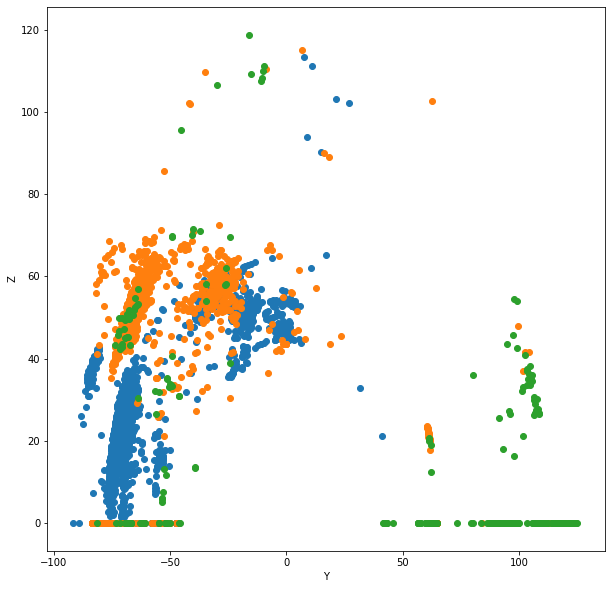

In [172]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(3):
    subset = d2[d2['target'] == i+1]
    ax.scatter(subset.y,subset.z)
ax.set_xlabel('Y')
ax.set_ylabel('Z')

In [174]:
from sklearn.cluster import KMeans

In [175]:
kmeans = KMeans(n_clusters=2,random_state=123)

In [192]:
sensor1 = d2[d2['target'] == 1]
sensor1 = sensor1[['x','y','z','amplitude']]
sensor1.head()

,x,y,z,amplitude
0,14.235047,5.802367,52.808105,0.000214
1,-0.305706,-0.988374,54.990269,0.000058
2,-10.438991,-18.877024,50.593334,0.000184
3,-7.374325,-18.961926,51.098578,0.000212
4,-7.330914,-17.564358,51.601851,0.000225


In [193]:
kmeans.fit(sensor1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [194]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

(0, 0.001)

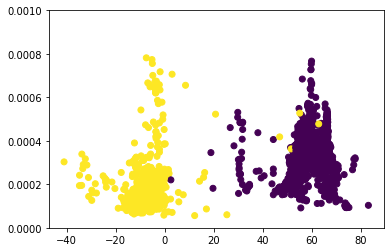

In [195]:
plt.scatter(sensor1.x,sensor1.amplitude,c=kmeans.labels_)
plt.ylim(0,0.001)

In [181]:
sensor1.head()

,x,y,z,target,amplitude,timestamp
0,14.235047,5.802367,52.808105,1.0,0.000214,1.538273e+09
1,-0.305706,-0.988374,54.990269,1.0,0.000058,1.538273e+09
2,-10.438991,-18.877024,50.593334,1.0,0.000184,1.538273e+09
3,-7.374325,-18.961926,51.098578,1.0,0.000212,1.538273e+09
4,-7.330914,-17.564358,51.601851,1.0,0.000225,1.538273e+09
